In [43]:
import xarray as xr
import zarr
import numcodecs
import constants
import numpy as np

In [40]:
name = "2022_02"
filepath = f'{constants.DATASET_PATH}/global/{name}.nc'

In [41]:
import glob

nc_files = glob.glob(f'{constants.DATASET_PATH}/global/*.nc')

print(nc_files)

['/work/ec249/ec249/bet20/dataset/era5/global/2022_02.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_12.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_06.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_08.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_04.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_01.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_03.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_07.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_09.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_10.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_11.nc', '/work/ec249/ec249/bet20/dataset/era5/global/2022_05.nc']


In [42]:
dataset_path = "data/era5_uk_reduced/samples/train"

In [45]:
for j, filepath in enumerate(nc_files):
    if j > 3:
        break
    data = xr.open_dataset(filepath)
    for i, time in enumerate(data['time'].values):
        if i > 3:
            break
        
        time = data['time'].values[i]
        sample = data.sel(time=time)
        array = sample.to_array().values # (n_vars, n_levels, n_lat, n_lon)
        time_py = time.astype('M8[ms]').tolist() # numpy.datetime64 -> datetime.datetime
        date_str = time_py.strftime('%Y%m%d%H%M%S') # datetime.datetime -> str
        
        np.save(f'{dataset_path}/{date_str}.npy', array)
        print("Proccessed time: ", date_str)

Proccessed time:  20220201000000
Proccessed time:  20220201060000
Proccessed time:  20220201120000
Proccessed time:  20220201180000
Proccessed time:  20221201000000
Proccessed time:  20221201060000
Proccessed time:  20221201120000
Proccessed time:  20221201180000
Proccessed time:  20220601000000
Proccessed time:  20220601060000
Proccessed time:  20220601120000
Proccessed time:  20220601180000
Proccessed time:  20220801000000
Proccessed time:  20220801060000
Proccessed time:  20220801120000
Proccessed time:  20220801180000


In [49]:
import torch

ImportError: /work/ec249/ec249/bet20/nlam/lib/python3.9/site-packages/torch/lib/libtorch_cuda.so: undefined symbol: ncclGetLastError

In [48]:
import os
import torch

sample_dir_path = "data/era5_uk_reduced/samples/train/"
sample_name = "20220201000000.npy"

sample_path = os.path.join(sample_dir_path, f"{sample_name}")
try:
    full_sample = torch.tensor(np.load(sample_path),
            dtype=torch.float32) # (n_vars, n_levels, n_lat, n_lon)
except ValueError:
    print(f"Failed to load {sample_path}")

full_sample.shape


ImportError: /work/ec249/ec249/bet20/nlam/lib/python3.9/site-packages/torch/lib/libtorch_cuda.so: undefined symbol: ncclGetLastError

In [3]:
data = xr.open_dataset(filepath)

In [4]:
data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 7, time: 112)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 50 150 250 400 600 850 1000
  * time       (time) datetime64[ns] 2022-02-01 ... 2022-02-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [23]:
import numpy as np

# Create a 3D array with shape (2, 3, 4)
x = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
              [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

print("Original array:")
print(x)
print("Shape:", x.shape)

# Flatten the last two dimensions
x_flattened = x.reshape(x.shape[0], -1)

print("\nFlattened array:")
print(x_flattened)
print("Shape:", x_flattened.shape)

Original array:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]
Shape: (2, 3, 4)

Flattened array:
[[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [13 14 15 16 17 18 19 20 21 22 23 24]]
Shape: (2, 12)


In [33]:
time_0 = data['time'].values[0]
data_at_time = data.sel(time=time_0)
array_at_time = data_at_time.to_array().values # (n_vars, n_levels, n_lat, n_lon)
time_0_py = time_0.astype('M8[ms]').tolist() # numpy.datetime64 -> datetime.datetime
date_str = time_0_py.strftime('%Y%m%d%H%M%S') # datetime.datetime -> str
print(date_str)

dataset_path = "data/era5_uk_reduced/samples/train"

np.save(f'{dataset_path}/{date_str}.npy', array_at_time)

20220201000000


In [32]:
loaded_array = np.load(f'{date_str}.npy')
loaded_array.shape

(6, 7, 721, 1440)

In [ ]:

array_at_time = array_at_time.transpose(3, 2, 1, 0) # (n_lon, n_lat, n_levels, n_vars)
array_at_time = array_at_time.reshape(array_at_time.shape[0], array_at_time.shape[1], -1) # (n_lon, n_lat, n_levels * n_vars)
array_at_time.shape

In [10]:
for i, time in enumerate(data['time'].values):
    if i > 3:
        break
    # Select the data at this time step
    data_at_time = data.sel(time=time)
    
    # Convert the data to a numpy array
    array_at_time = data_at_time.to_array().values
    
    # Save the numpy array
    print(data_at_time)
    # np.save(f'data_at_time_{i}.npy', array_at_time)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 50 150 250 400 600 850 1000
    time       datetime64[ns] 2022-02-01
Data variables:
    z          (level, latitude, longitude) float32 1.845e+05 ... 362.9
    q          (level, latitude, longitude) float32 3.164e-06 ... 0.0002562
    t          (level, latitude, longitude) float32 190.8 190.8 ... 262.3 262.3
    u          (level, latitude, longitude) float32 0.0001526 ... 0.0001526
    v          (level, latitude, longitude) float32 -0.001614 ... 0.001143
    w          (level, latitude, longitude) float32 -0.01348 ... 0.01303
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, lev

In [5]:
era5_global_mean = data.mean(dim=("time", "latitude", "longitude"))

: 

In [ ]:
era5_global_mean

In [5]:
type(data)

xarray.core.dataset.Dataset

In [19]:
# N, W, S, E
uk_coords = [(63, 47), (350, 4)]

In [26]:
# Slice for the longitude from 350 to 360
subset1 = data.sel(latitude=slice(63, 47), longitude=slice(350, 360))

# Slice for the longitude from 0 to 4
subset2 = data.sel(latitude=slice(63, 47), longitude=slice(0, 4))

# Concatenate the two subsets along the longitude dimension
subset = xr.concat([subset1, subset2], dim='longitude')

In [27]:
subset

<xarray.Dataset>
Dimensions:    (longitude: 57, latitude: 65, level: 7, time: 112)
Coordinates:
  * longitude  (longitude) float32 350.0 350.2 350.5 350.8 ... 3.25 3.5 3.75 4.0
  * latitude   (latitude) float32 63.0 62.75 62.5 62.25 ... 47.5 47.25 47.0
  * level      (level) int32 50 150 250 400 600 850 1000
  * time       (time) datetime64[ns] 2022-02-01 ... 2022-02-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 1.915e+05 ... 2.17e+03
    q          (time, level, latitude, longitude) float32 3.164e-06 ... 0.00446
    t          (time, level, latitude, longitude) float32 191.8 192.0 ... 283.2
    u          (time, level, latitude, longitude) float32 58.46 58.45 ... -1.911
    v          (time, level, latitude, longitude) float32 -13.31 ... -0.5006
    w          (time, level, latitude, longitude) float32 0.06605 ... 0.1339
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [22]:
ds = data.sortby('longitude')


In [23]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 7, time: 112)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 50 150 250 400 600 850 1000
  * time       (time) datetime64[ns] 2022-02-01 ... 2022-02-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [24]:
uk_subset = ds.sel(latitude=slice(*uk_coords[0]), longitude=slice(*uk_coords[1]))

In [25]:
uk_subset

<xarray.Dataset>
Dimensions:    (longitude: 0, latitude: 65, level: 7, time: 112)
Coordinates:
  * longitude  (longitude) float32 
  * latitude   (latitude) float32 63.0 62.75 62.5 62.25 ... 47.5 47.25 47.0
  * level      (level) int32 50 150 250 400 600 850 1000
  * time       (time) datetime64[ns] 2022-02-01 ... 2022-02-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
subset

<xarray.Dataset>
Dimensions:    (longitude: 17, latitude: 65, level: 7, time: 112)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 3.25 3.5 3.75 4.0
  * latitude   (latitude) float32 63.0 62.75 62.5 62.25 ... 47.5 47.25 47.0
  * level      (level) int32 50 150 250 400 600 850 1000
  * time       (time) datetime64[ns] 2022-02-01 ... 2022-02-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
data.latitude.values

array([ 90.  ,  89.75,  89.5 ,  89.25,  89.  ,  88.75,  88.5 ,  88.25,
        88.  ,  87.75,  87.5 ,  87.25,  87.  ,  86.75,  86.5 ,  86.25,
        86.  ,  85.75,  85.5 ,  85.25,  85.  ,  84.75,  84.5 ,  84.25,
        84.  ,  83.75,  83.5 ,  83.25,  83.  ,  82.75,  82.5 ,  82.25,
        82.  ,  81.75,  81.5 ,  81.25,  81.  ,  80.75,  80.5 ,  80.25,
        80.  ,  79.75,  79.5 ,  79.25,  79.  ,  78.75,  78.5 ,  78.25,
        78.  ,  77.75,  77.5 ,  77.25,  77.  ,  76.75,  76.5 ,  76.25,
        76.  ,  75.75,  75.5 ,  75.25,  75.  ,  74.75,  74.5 ,  74.25,
        74.  ,  73.75,  73.5 ,  73.25,  73.  ,  72.75,  72.5 ,  72.25,
        72.  ,  71.75,  71.5 ,  71.25,  71.  ,  70.75,  70.5 ,  70.25,
        70.  ,  69.75,  69.5 ,  69.25,  69.  ,  68.75,  68.5 ,  68.25,
        68.  ,  67.75,  67.5 ,  67.25,  67.  ,  66.75,  66.5 ,  66.25,
        66.  ,  65.75,  65.5 ,  65.25,  65.  ,  64.75,  64.5 ,  64.25,
        64.  ,  63.75,  63.5 ,  63.25,  63.  ,  62.75,  62.5 ,  62.25,
      

In [9]:
encoding = {var: {"compressor": numcodecs.get_codec(dict(id="zlib", level=5))} for var in data.data_vars}

In [10]:
encoding

{'z': {'compressor': Zlib(level=5)},
 'q': {'compressor': Zlib(level=5)},
 't': {'compressor': Zlib(level=5)},
 'u': {'compressor': Zlib(level=5)},
 'v': {'compressor': Zlib(level=5)},
 'w': {'compressor': Zlib(level=5)}}

In [12]:
data.chunk({"time": 1})

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 7, time: 112)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 50 150 250 400 600 850 1000
  * time       (time) datetime64[ns] 2022-02-01 ... 2022-02-28T18:00:00
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    t          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(1, 7, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-02 23:49:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
d = data.chunk({"time": 1})
with zarr.ZipStore(f'./dataset_scratch/{name}.zarr.zip', mode='w') as store:
    d.to_zarr(store, encoding=encoding, compute=True)

In [ ]:

print(data)
encoding = {var: {"compressor": numcodecs.get_codec(dict(id="zlib", level=5))} for var in data.data_vars}
d = data.chunk({"time": 1})
with zarr.ZipStore(f'/local/scratch-2/asv34/graph_weather/dataset/final/{region}/{region}_{year}/{year}_{str(month).zfill(2)}_{str(day).zfill(2)}_{time[:2]}.zarr.zip', mode='w') as store:
    d.to_zarr(store, encoding=encoding, compute=True)

In [1]:
import xarray as xr
import zarr
import numcodecs
import constants

name = "2022_02"
filepath = f'{constants.DATASET_PATH}/global/{name}.nc'

In [2]:
data = xr.open_dataset(filepath)

### Get UK subset ###
# Slice for the longitude from 350 to 360
subset1 = data.sel(latitude=slice(63, 47), longitude=slice(350, 360))

# Slice for the longitude from 0 to 4
subset2 = data.sel(latitude=slice(63, 47), longitude=slice(0, 4))

# Concatenate the two subsets along the longitude dimension
uk_subset = xr.concat([subset1, subset2], dim='longitude')

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

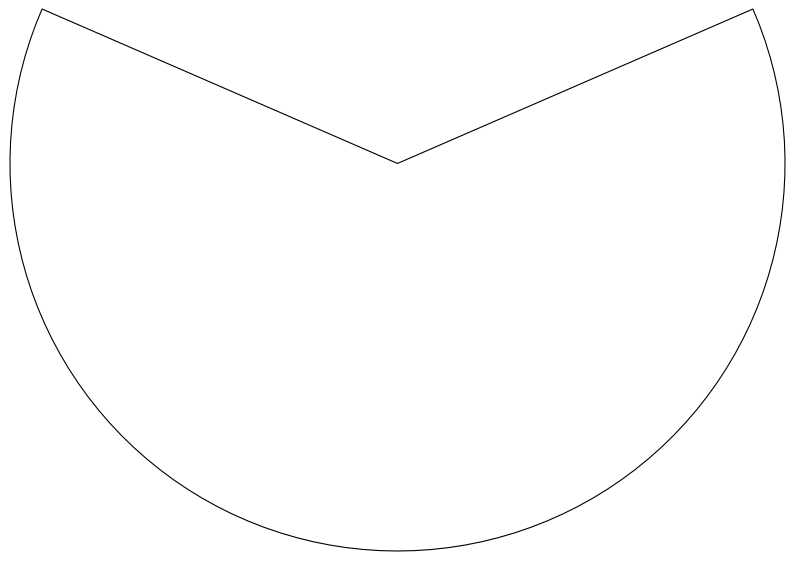

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a Lambert Conformal projection
projection = ccrs.LambertConformal(central_longitude=-10, central_latitude=63)

# Create a plot with this projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Plot the data
uk_subset.plot(ax=ax, transform=ccrs.PlateCarree())

plt.show()

In [2]:
import torch
import torch.nn as nn
import os

In [4]:
class BufferList(nn.Module):
    """
    A list of torch buffer tensors that sit together as a Module with no parameters and only
    buffers.

    This should be replaced by a native torch BufferList once implemented.
    See: https://github.com/pytorch/pytorch/issues/37386
    """
    def __init__(self, buffer_tensors, persistent=True):
        super().__init__()
        self.n_buffers = len(buffer_tensors)
        for buffer_i, tensor in enumerate(buffer_tensors):
            self.register_buffer(f"b{buffer_i}", tensor, persistent=persistent)

    def __getitem__(self, key):
        return getattr(self, f"b{key}")

    def __len__(self):
        return self.n_buffers

    def __iter__(self):
        return (self[i] for i in range(len(self)))
    
def load_graph(graph_name: str, device: str="cpu"):
    """
    Load graph structure and features from disk.
    
    Requires graph_name to be a directory in the graphs/ directory, containing the data as .pt files.
    This should be generated by running create_mesh.py
    
    Returns: dict of graph edges and edge features
    """
    # Define helper lambda function
    graph_dir_path = os.path.join("graphs", graph_name)
    loads_file = lambda fn: torch.load(os.path.join(graph_dir_path, fn),
            map_location=device)

    # Load edges (edge_index)
    m2m_edge_index = BufferList(loads_file("m2m_edge_index.pt"),
            persistent=False) # List of (2, M_m2m[l])
    g2m_edge_index = loads_file("g2m_edge_index.pt")  # (2, M_g2m)
    m2g_edge_index = loads_file("m2g_edge_index.pt")  # (2, M_m2g)

    n_levels = len(m2m_edge_index)
    hierarchical = n_levels > 1 # Nor just single level mesh graph

    # Load static edge features
    m2m_features = loads_file("m2m_features.pt")  # List of (M_m2m[l], d_edge_f)
    g2m_features = loads_file("g2m_features.pt")  # (M_g2m, d_edge_f)
    m2g_features = loads_file("m2g_features.pt")  # (M_m2g, d_edge_f)

    # Normalize by dividing with longest edge (found in m2m)
    longest_edge = max([torch.max(level_features[:,0])
        for level_features in m2m_features]) # Col. 0 is length
    m2m_features = BufferList([level_features / longest_edge
        for level_features in m2m_features], persistent=False)
    g2m_features = g2m_features / longest_edge
    m2g_features = m2g_features / longest_edge

    # Load static node features
    mesh_static_features = loads_file("mesh_features.pt"
            ) # List of (N_mesh[l], d_mesh_static)

    # Some checks for consistency
    assert len(m2m_features) == n_levels, "Inconsistent number of levels in mesh"
    assert len(mesh_static_features) == n_levels, "Inconsistent number of levels in mesh"

    if hierarchical:
        # Load up and down edges and features
        mesh_up_edge_index = BufferList(loads_file("mesh_up_edge_index.pt"),
                persistent=False) # List of (2, M_up[l])
        mesh_down_edge_index = BufferList(loads_file("mesh_down_edge_index.pt"),
                persistent=False) # List of (2, M_down[l])

        mesh_up_features = loads_file("mesh_up_features.pt"
                ) # List of (M_up[l], d_edge_f)
        mesh_down_features = loads_file("mesh_down_features.pt"
                ) # List of (M_down[l], d_edge_f)

        # Rescale
        mesh_up_features = BufferList([edge_features / longest_edge
                for edge_features in mesh_up_features], persistent=False)
        mesh_down_features = BufferList([edge_features / longest_edge
                for edge_features in mesh_down_features], persistent=False)

        mesh_static_features = BufferList(mesh_static_features, persistent=False)
    else:
        # Extract single mesh level
        m2m_edge_index = m2m_edge_index[0]
        m2m_features = m2m_features[0]
        mesh_static_features = mesh_static_features[0]

        mesh_up_edge_index, mesh_down_edge_index, mesh_up_features, mesh_down_features =\
                [], [], [], []

    return hierarchical, {
            "g2m_edge_index": g2m_edge_index,
            "m2g_edge_index": m2g_edge_index,
            "m2m_edge_index": m2m_edge_index,
            "g2m_features": g2m_features,
            "m2g_features": m2g_features,
            "m2m_features": m2m_features,
            "mesh_up_edge_index": mesh_up_edge_index,
            "mesh_down_edge_index": mesh_down_edge_index,
            "mesh_up_features": mesh_up_features,
            "mesh_down_features": mesh_down_features,
            "mesh_static_features": mesh_static_features,
    }

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

graph_name = "multiscale"

# Define helper lambda function
graph_dir_path = os.path.join("graphs", graph_name)
loads_file = lambda fn: torch.load(os.path.join(graph_dir_path, fn),
        map_location=device)

# Load edges (edge_index)
m2m_edge_index = BufferList(loads_file("m2m_edge_index.pt"),
        persistent=False) # List of (2, M_m2m[l])
g2m_edge_index = loads_file("g2m_edge_index.pt")  # (2, M_g2m)
m2g_edge_index = loads_file("m2g_edge_index.pt")  # (2, M_m2g)


n_levels = len(m2m_edge_index)
hierarchical = n_levels > 1 # Nor just single level mesh graph

# Load static edge features
m2m_features = loads_file("m2m_features.pt")  # List of (M_m2m[l], d_edge_f)
g2m_features = loads_file("g2m_features.pt")  # (M_g2m, d_edge_f)
m2g_features = loads_file("m2g_features.pt")  # (M_m2g, d_edge_f)

mesh_static_features = loads_file("mesh_features.pt") # List of (N_mesh[l], d_mesh_static)


Using device: cpu


In [27]:
print(m2m_edge_index[0].shape)
print(mesh_static_features[0].shape)
print(m2m_features[0].shape)


torch.Size([2, 57616])
torch.Size([6561, 2])
torch.Size([57616, 3])
